In [1]:
import os
import sys
import math
path_base = os.getcwd()+"/.."
if path_base not in sys.path:
    sys.path.append(path_base)

import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.patches
import matplotlib.pyplot as plt


import shapely
import mfjet 

In [2]:
calculator_m = mfjet.MFManhattanCalculator()
calculator_p = mfjet.MFPixelCalculator(0.1, diagonal_connected=False)
calculator_mp = mfjet.MFManhattanPixelCalculator(0.1, diagonal_connected=False)

In [3]:
coords = np.array([
    [-1,-1],
    [-1,1],
    [1,-1],
    [0,0],
    [0,0.1],
    [0,-0.0001]
])
arr_r = np.linspace(0,5,101)
arr_r_dig = np.ceil((arr_r + 1e-6)/ (0.05)) * 0.05
print(arr_r[:10])
print(arr_r_dig[:10])

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]


In [4]:
arr_r_dig[9]

0.5

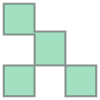

In [5]:
calculator_m.dilate_points_by_square(coords, arr_r_dig[9])

In [6]:
from mfjet.pixel_utils import *

In [7]:
bcoords = coords_to_binned_coords(
    coords,
    bin_width=0.1,
    mode="center"
)

In [8]:
arr_mfs_p = calculator_p.calc_mfs(coords, arr_r)

In [9]:
arr_mfs_m = calculator_m.calc_mfs(bcoords, arr_r_dig)

In [10]:
arr_mfs_mp = calculator_mp.calc_mfs(coords, arr_r)

In [11]:
arr_mfs_p[9]

array([ 3. , 16. ,  4.1])

In [12]:
arr_mfs_m[9]

array([ 3. , 16. ,  4.1])

In [13]:
print(arr_r[9])
print(arr_r_dig[9])

0.45
0.5


In [14]:
((arr_mfs_m - arr_mfs_p) / (arr_mfs_m + arr_mfs_p)).max()

4.1633363423443346e-16

In [17]:
((arr_mfs_mp - arr_mfs_m) / (arr_mfs_mp + arr_mfs_m)).max()

0.0

In [15]:
import time

In [2]:
time_start = time.time()
for _ in range(100):
    arr_mfs = calculator_m.calc_mfs(coords, arr_r)
print(arr_mfs.shape)
print("time elapsed: {:02f} s".format(time.time() - time_start))

NameError: name 'time' is not defined

In [6]:
time_start = time.time()
for _ in range(100):
    arr_mfs = calculator_p.calc_mfs(coords, arr_r)
print(arr_mfs.shape)
print("time elapsed: {:02f} s".format(time.time() - time_start))

(501, 3)
time elapsed: 19.686443 s


In [7]:
np.stack(np.meshgrid(np.arange(10),np.arange(10)), axis=-1).shape

(10, 10, 2)